In [13]:
%matplotlib inline

In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [34]:
img = mpimg.imread('bella.jpg')

In [35]:
type(img)

numpy.ndarray

In [49]:
img.shape

(3024, 4032, 3)

In [37]:
print(img)

[[[255 244 231]
  [255 244 231]
  [255 243 230]
  ...
  [ 95  96  91]
  [100 101  96]
  [100 101  96]]

 [[255 244 231]
  [255 244 231]
  [255 242 229]
  ...
  [ 96  97  92]
  [100 101  96]
  [100 101  96]]

 [[255 244 231]
  [255 243 230]
  [255 242 229]
  ...
  [ 97  98  93]
  [ 99 100  95]
  [ 99 100  95]]

 ...

 [[121 109  93]
  [121 109  93]
  [120 108  92]
  ...
  [153 146 128]
  [152 145 127]
  [152 145 127]]

 [[123 111  95]
  [122 110  94]
  [121 109  93]
  ...
  [154 147 129]
  [153 146 128]
  [152 145 127]]

 [[124 112  96]
  [123 111  95]
  [122 110  94]
  ...
  [154 147 129]
  [153 146 128]
  [153 146 128]]]


In [38]:
img.dtype

dtype('uint8')

In [29]:
def bbox_to_rect(bbox, color):
    """Convert bounding box to matplotlib format."""
    # Convert the bounding box (top-left x, top-left y, bottom-right x,
    # bottom-right y) format to matplotlib format: ((upper-left x,
    # upper-left y), width, height)
    return plt.Rectangle(
        xy=(bbox[0], bbox[1]), width=bbox[2]-bbox[0], height=bbox[3]-bbox[1],
        fill=False, edgecolor=color, linewidth=2)

In [40]:
bella = [250, 1000, 3900, 2750]

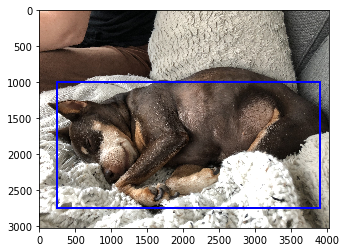

In [50]:
imgplot = plt.imshow(img)
imgplot.axes.add_patch(bbox_to_rect(bella, 'blue'));

# Create TFRecord File

In [43]:
import tensorflow as tf

In [48]:
from object_detection.utils import dataset_util

In [65]:
writer = tf.python_io.TFRecordWriter('bella_train.record')

In [66]:
height = 3024
width = 4032
filename = 'bella.jpg'
image_format = b'jpg'

xmins = [250.0 / 4032.0]
xmaxs = [3900.0 / 4032.0]
ymins = [1000.0 / 3024.0]
ymaxs = [2750.0 / 3024.0]

classes_text = ['bella'.encode('utf8')]
classes = [91]

with tf.gfile.GFile(filename, 'rb') as fid:
    encoded_jpg = fid.read()
    
    tf_example = tf.train.Example(features=tf.train.Features(feature={
      'image/height': dataset_util.int64_feature(height),
      'image/width': dataset_util.int64_feature(width),
      'image/filename': dataset_util.bytes_feature(filename.encode('utf8')),
      'image/source_id': dataset_util.bytes_feature(filename.encode('utf8')),
      'image/encoded': dataset_util.bytes_feature(encoded_jpg),
      'image/format': dataset_util.bytes_feature(image_format),
      'image/object/bbox/xmin': dataset_util.float_list_feature(xmins),
      'image/object/bbox/xmax': dataset_util.float_list_feature(xmaxs),
      'image/object/bbox/ymin': dataset_util.float_list_feature(ymins),
      'image/object/bbox/ymax': dataset_util.float_list_feature(ymaxs),
      'image/object/class/text': dataset_util.bytes_list_feature(classes_text),
      'image/object/class/label': dataset_util.int64_list_feature(classes),
    }))

In [67]:
writer.write(tf_example.SerializeToString())

In [68]:
writer.close()

# Live Camera Feed

In [32]:
import traitlets
import ipywidgets.widgets as widgets
from IPython.display import display
from jetbot import Camera, bgr8_to_jpeg

In [42]:
camera = Camera.instance(width=224, height=224)

image = widgets.Image(format='jpeg', width=224, height=224)  # this width and height doesn't necessarily have to match the camera

camera_link = traitlets.dlink((camera, 'value'), (image, 'value'), transform=bgr8_to_jpeg)

display(image)